# Use case : Churn prediction in telecommunications

In [1]:
# Loading of libraries
import pandas as pd
import numpy as np
import math as mt
import sklearn as sk
import csv
import matplotlib.pyplot as plt
import time

In [2]:
# Loading the data set
data = pd.read_csv("Data/churn.all.txt", sep = ",", header = None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
0     5000 non-null object
1     5000 non-null int64
2     5000 non-null int64
3     5000 non-null object
4     5000 non-null object
5     5000 non-null object
6     5000 non-null int64
7     5000 non-null float64
8     5000 non-null int64
9     5000 non-null float64
10    5000 non-null float64
11    5000 non-null int64
12    5000 non-null float64
13    5000 non-null float64
14    5000 non-null int64
15    5000 non-null float64
16    5000 non-null float64
17    5000 non-null int64
18    5000 non-null float64
19    5000 non-null int64
20    5000 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 820.4+ KB


In [3]:
metadata = pd.read_csv("Data/churn.names.txt", sep = ",", header = None)
print(metadata)

                                                    0
0   | Churn data (artificial based on claims simil...
1                                           discrete.
2                                    state: discrete.
3                         account length: continuous.
4                              area code: continuous.
5                             phone number: discrete.
6                       international plan: discrete.
7                          voice mail plan: discrete.
8                  number vmail messages: continuous.
9                      total day minutes: continuous.
10                       total day calls: continuous.
11                      total day charge: continuous.
12                     total eve minutes: continuous.
13                       total eve calls: continuous.
14                      total eve charge: continuous.
15                   total night minutes: continuous.
16                     total night calls: continuous.
17                    total 

In [4]:
data.shape

(5000, 21)

We get a data set of 5000 phone lines and 21 features.

One feature concerns the phone line and has a role of a unique **ID**. This variable will be named *phone_number*.

One feature represents the target variable: if the customer has ended his subscription (True or False). This the variable we want to predict. It will be referred later as *churn*.

Thus, we have 19 potential explanatory variables for predicting churn.

In [5]:
data.columns = ["state","account_length","area_code","phone_number","int_plan","voice_plan","number_messages",
                "day_minutes","day_calls","day_charge","eve_minutes","eve_calls","eve_charge","night_minutes",
                "night_calls","night_charge","intl_minutes","intl_calls","intl_charge","customer_service_calls",
                "churn"]

In [6]:
data.head()

,state,account_length,area_code,phone_number,int_plan,voice_plan,number_messages,day_minutes,day_calls,day_charge,...,eve_calls,eve_charge,night_minutes,night_calls,night_charge,intl_minutes,intl_calls,intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
data.describe()

,account_length,area_code,number_messages,day_minutes,day_calls,day_charge,eve_minutes,eve_calls,eve_charge,night_minutes,night_calls,night_charge,intl_minutes,intl_calls,intl_charge,customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
data.isnull().sum().sum()

0

There is no NA values in our data set. Now, we need to do some descriptive statistics in order to get more insights of the probleme and check if there are any outliers.

In [9]:
print(data.area_code.value_counts())
print(data.int_plan.value_counts())
print(data.voice_plan.value_counts())

415    2495
408    1259
510    1246
Name: area_code, dtype: int64
 no     4527
 yes     473
Name: int_plan, dtype: int64
 no     3677
 yes    1323
Name: voice_plan, dtype: int64


We have three categorical variables:
- *area_code* (415/408/510)
- *int_plan* (yes/no)
- *voice_plan* (yes/no)

The remaining sixteen others variables are numeric.

# Step n°1: Descriptive Statistics

In [10]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(*args, **kwargs)
    Get or set the *x*-limits of the current tick locations and labels.
    
    ::
    
      # return locs, labels where locs is an array of tick locations and
      # labels is an array of tick labels.
      locs, labels = xticks()
    
      # set the locations of the xticks
      xticks( arange(6) )
    
      # set the locations and labels of the xticks
      xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
    
    The keyword args, if any, are :class:`~matplotlib.text.Text`
    properties. For example, to rotate long labels::
    
      xticks( arange(12), calendar.month_name[1:13], rotation=17 )



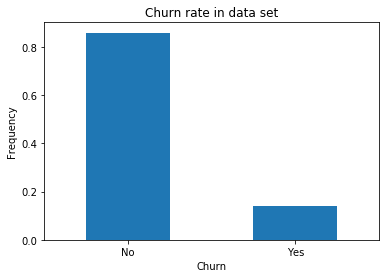

In [11]:
proportions = data.churn.value_counts()/5000
proportions.plot(kind = 'bar')
plt.title("Churn rate in data set")
plt.xlabel("Churn")
plt.xticks(range(2), ["No", "Yes"], rotation=0)
plt.ylabel("Frequency")
plt.show()

In [12]:
print(round(proportions*100, 1))

 False.    85.9
 True.     14.1
Name: churn, dtype: float64


We have indeed almost 14% of churn in our data set.

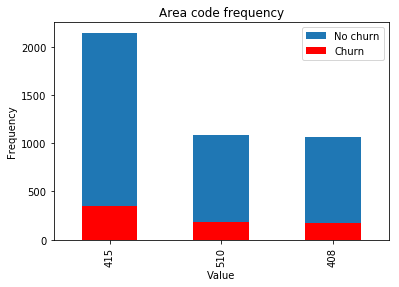

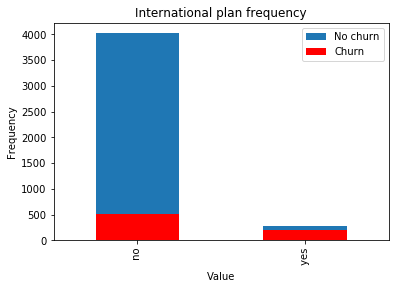

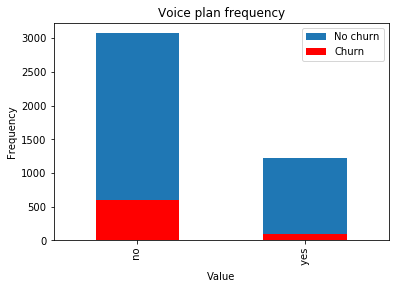

In [13]:
# categorical variables
legend = ["No churn", "Churn"]

# area code
data[data["churn"] == ' False.'].area_code.value_counts().plot(kind = 'bar')
data[data["churn"] == ' True.'].area_code.value_counts().plot(kind = 'bar', color = 'r')
plt.title("Area code frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)
plt.show()

# international plan
data[data["churn"] == ' False.'].int_plan.value_counts().plot(kind = 'bar')
data[data["churn"] == ' True.'].int_plan.value_counts().plot(kind = 'bar', color = 'r')
plt.title("International plan frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)
plt.show()

# voice plan
data[data["churn"] == ' False.'].voice_plan.value_counts().plot(kind = 'bar')
data[data["churn"] == ' True.'].voice_plan.value_counts().plot(kind = 'bar', color = 'r')
plt.title("Voice plan frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)
plt.show()

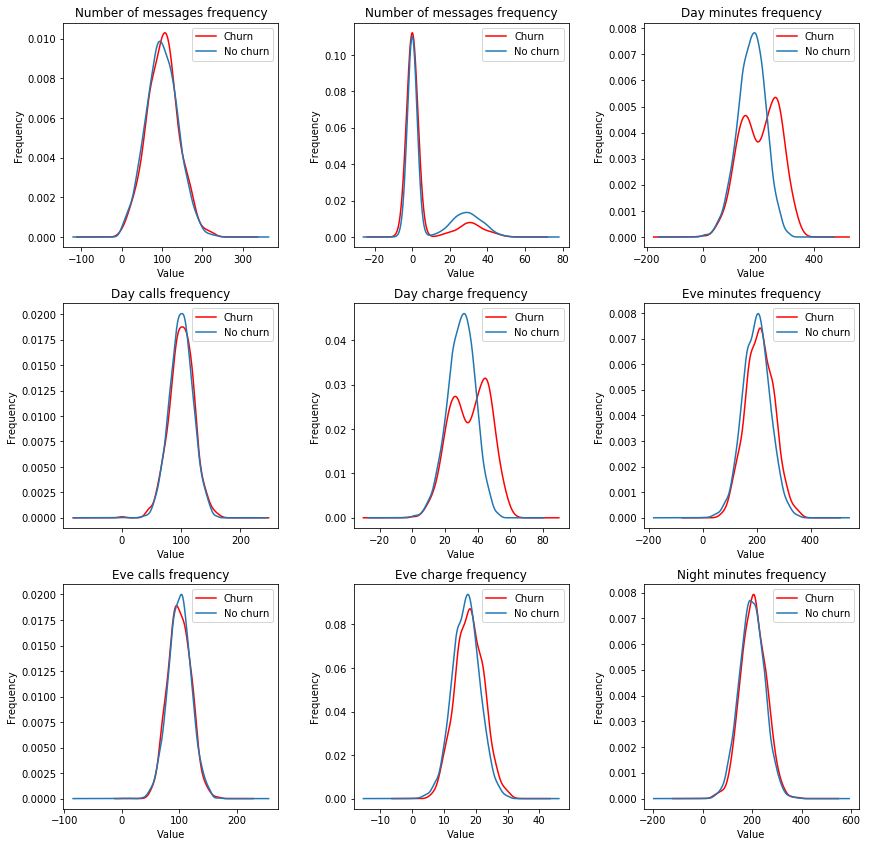

In [14]:
# numeric variables

legend = ["Churn", "No churn"]
plt.figure(figsize=(13,13))

plt.subplot(331)
data[data["churn"] == ' True.'].account_length.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].account_length.plot(kind = 'density')
plt.title("Number of messages frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplot(332)
data[data["churn"] == ' True.'].number_messages.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].number_messages.plot(kind = 'density')
plt.title("Number of messages frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplot(333)
data[data["churn"] == ' True.'].day_minutes.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].day_minutes.plot(kind = 'density')
plt.title("Day minutes frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplot(334)
data[data["churn"] == ' True.'].day_calls.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].day_calls.plot(kind = 'density')
plt.title("Day calls frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplot(335)
data[data["churn"] == ' True.'].day_charge.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].day_charge.plot(kind = 'density')
plt.title("Day charge frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplot(336)
data[data["churn"] == ' True.'].eve_minutes.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].eve_minutes.plot(kind = 'density')
plt.title("Eve minutes frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplot(337)
data[data["churn"] == ' True.'].eve_calls.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].eve_calls.plot(kind = 'density')
plt.title("Eve calls frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplot(338)
data[data["churn"] == ' True.'].eve_charge.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].eve_charge.plot(kind = 'density')
plt.title("Eve charge frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplot(339)
data[data["churn"] == ' True.'].night_minutes.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].night_minutes.plot(kind = 'density')
plt.title("Night minutes frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

*Intepretation* : 

 - Churners tend to send less messages as we can see on the second plot of the first row.
 - Churners tend to have more long calls during the day as we can see on the third plot in the frist row.
 - These descriptive statistics plot allow us to see that day/eve charge are very closed to the day/eve minutes frequency. The range of values differ but they seem highly correlated.

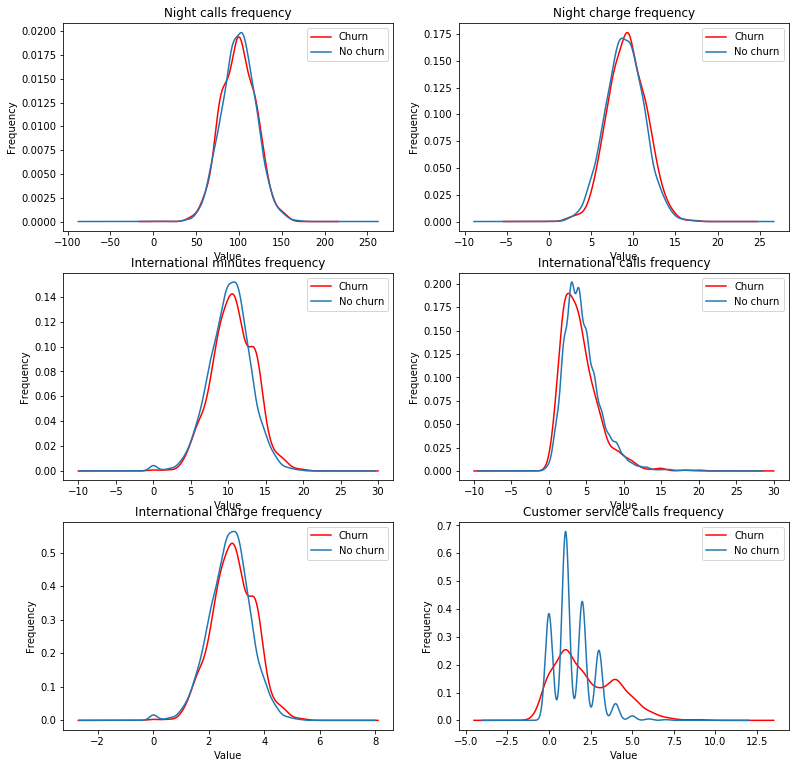

In [15]:
legend = ["Churn", "No churn"]
plt.figure(figsize=(13,13))

plt.subplot(321)
data[data["churn"] == ' True.'].night_calls.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].night_calls.plot(kind = 'density')
plt.title("Night calls frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplot(322)
data[data["churn"] == ' True.'].night_charge.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].night_charge.plot(kind = 'density')
plt.title("Night charge frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplot(323)
data[data["churn"] == ' True.'].intl_minutes.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].intl_minutes.plot(kind = 'density')
plt.title("International minutes frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplot(324)
data[data["churn"] == ' True.'].intl_calls.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].intl_calls.plot(kind = 'density')
plt.title("International calls frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplot(325)
data[data["churn"] == ' True.'].intl_charge.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].intl_charge.plot(kind = 'density')
plt.title("International charge frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.subplot(326)
data[data["churn"] == ' True.'].customer_service_calls.plot(kind = 'density', color = 'r')
data[data["churn"] == ' False.'].customer_service_calls.plot(kind = 'density')
plt.title("Customer service calls frequency")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(legend)

plt.show()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.95,
                    wspace=0.95)

*Interpretation* :

- Churners tend to call more frequently the customer service than other customers as the finaly plot show. Churners seem to have problem with their phone lines.

In [16]:
data.corr()[data.corr()>0.9]

,account_length,area_code,number_messages,day_minutes,day_calls,day_charge,eve_minutes,eve_calls,eve_charge,night_minutes,night_calls,night_charge,intl_minutes,intl_calls,intl_charge,customer_service_calls
account_length,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_code,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_messages,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_minutes,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_calls,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_charge,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eve_minutes,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eve_calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eve_charge,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
night_minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.999999,NaN,NaN,NaN,NaN


As we may have suspected earlier some pairs of variable are highly correlated (they bring the same information). We see that four pairs of variables have a correlation coefficient over 0.99:

- day_minutes and day_charge
- eve_minutes and eve_charge
- night_minutes and night_charge
- intl_minutes and intl_charge


In [17]:
# Transformation of categorical features

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

data["churn"] = enc.fit_transform(data["churn"])
data["area_code"] = enc.fit_transform(data["area_code"])
data["int_plan"] = enc.fit_transform(data["int_plan"])
data["voice_plan"] = enc.fit_transform(data["voice_plan"])
data["state"] = enc.fit_transform(data["state"])

## Step n°2: Split data into train and test sets

- training set ==> 80% of observations
- test set ==> 20 % of observations

In [18]:
from sklearn.model_selection import train_test_split

X = np.array(data.drop(["churn", "phone_number", "day_charge", "eve_charge", "night_charge", "intl_charge"], axis = 1))
# We get rid of the target variable, the one representing the ID 
# and the highly correlated variables
y = np.array(data["churn"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 15)
(1000, 15)
(4000,)
(1000,)


Thus, our training set is composed of 4000 phone lines and our test set contains 1000 phone lines. Our models will use 15 features in order to predict the future churn of a customer.

In [20]:
print(round(sum(y_train == 1)/y_train.shape[0]*100, 1))
print(round(sum(y_test == 1)/y_test.shape[0]*100, 1))

14.2
13.9


We check the consistency of our training and test sets. It seems to be ok.

## Step n°3: Machine Learning models

In this step we are going to try different machine learning models and choose the one that achives the best predictive performance. Each model will be preceded by a cross validation step that allow us to find the optimal hyper parameters.

### 1. Logistic Regression

$$ ln\frac{P(Y = 1/X)}{P(Y = 0/X)} = \beta_1 X_0 + \beta_2 X_2 + \dots \beta_p X_p + \epsilon $$

In [21]:
from sklearn.linear_model import LogisticRegression

model_glm = LogisticRegression()

model_glm.fit(X_train, y_train)

predictions_glm = model_glm.predict(X_test)

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_glm, X_train, y_train, scoring = 'recall')
print(scores)

[0.15789474 0.18518519 0.16931217]


### 2. Decision Tree

In [23]:
# hyper parameters learning through k-fold cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params  = {"criterion":["gini", "entropy"],
           "max_depth": np.arange(1,15),
           "max_features": np.arange(1,15),
           "class_weight": [None, "balanced"]
          }

grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 123), 
                           param_grid = params, 
                           cv = 5, 
                           scoring = 'accuracy',
                           n_jobs = 4)

tic = time.time()

grid_search.fit(X_train, y_train)

tac = time.time()

print("The model has taken " + str(round(tac-tic, 1)) + " seconds to run through cross-validation")

grid_search.best_params_

The model has taken 14.8 seconds to run through cross-validation


{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 14}

In [24]:
model_tree = DecisionTreeClassifier(criterion = 'entropy', 
                                    max_depth = 6, 
                                    max_features = 14,
                                    random_state = 123,
                                    class_weight = None)

model_tree.fit(X_train, y_train)

predictions_tree = model_tree.predict(X_test)

### 3. Random Forests

In [25]:
# hyper parameters learning through k-fold cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params  = {"criterion":["gini", "entropy"],
           "max_depth": np.arange(10,15),
           "max_features": np.arange(10,15),
           "class_weight": [None, "balanced"]
          }

grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 123, 
                                                              n_estimators = 100), 
                           param_grid = params, 
                           cv = 5, 
                           scoring = 'accuracy',
                           n_jobs = 4)

tic = time.time()

grid_search.fit(X_train, y_train)

tac = time.time()

print("The model has taken " + str(round(tac-tic, 1)) + " seconds to run through cross-validation")

grid_search.best_params_

The model has taken 235.5 seconds to run through cross-validation


{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 10}

In [26]:
model_rf = RandomForestClassifier(criterion = 'entropy', 
                                  max_depth = 14, 
                                  max_features = 10, 
                                  random_state = 123, 
                                  n_estimators = 100,
                                  class_weight = None)

model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)

### 4. AdaBoost

In [27]:
# hyper parameters learning through k-fold cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

params  = {"n_estimators": [50, 75, 100, 125, 150],
           "learning_rate": [0.01, 0.1, 0.5, 0.8, 1, 2, 3]
          }


grid_search = GridSearchCV(estimator = AdaBoostClassifier(random_state = 123), 
                           param_grid = params, 
                           cv = 5, 
                           scoring = 'accuracy', 
                           n_jobs = 4)

tic = time.time()

grid_search.fit(X_train, y_train)

tac = time.time()

print("The model has taken " + str(round(tac-tic, 1)) + " seconds to run through cross-validation")

grid_search.best_params_

The model has taken 28.3 seconds to run through cross-validation


{'learning_rate': 0.8, 'n_estimators': 100}

In [28]:
from sklearn.ensemble import AdaBoostClassifier

model_boost = AdaBoostClassifier(n_estimators = 100, 
                                 learning_rate = 0.8, 
                                 random_state = 123)

model_boost.fit(X_train, y_train)

predictions_boost = model_boost.predict(X_test)

# Step 4: Performance evaluation of algorithms

### Metrics

$Accuracy = \frac{1}{n}\sum_i^n \hat{y_i} == y_i $

$Recall  = \frac{TP}{TP + FN}$

$Precision  = \frac{TP}{TP + FP}$

$Fscore = 2 \frac{recall precision}{recall + precision}$

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Logistic Regression Performance')
print('')
print('Accuracy: ' + str(accuracy_score(y_test, predictions_glm)))
print(classification_report(y_test, predictions_glm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions_glm))
print('------------------------------------------------------')

print('Decision tree Performance')
print('')
print('Accuracy: ' + str(accuracy_score(y_test, predictions_tree)))
print(classification_report(y_test, predictions_tree))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions_tree))
print('------------------------------------------------------')

print('Random Forests Performance')
print('')
print('Accuracy: ' + str(accuracy_score(y_test, predictions_rf)))
print(classification_report(y_test, predictions_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions_rf))
print('------------------------------------------------------')

print('AdaBoost Performance')
print('')
print('Accuracy: ' + str(accuracy_score(y_test, predictions_boost)))
print(classification_report(y_test, predictions_boost))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions_boost))

Logistic Regression Performance

Accuracy: 0.87
             precision    recall  f1-score   support

          0       0.89      0.97      0.93       861
          1       0.58      0.22      0.32       139

avg / total       0.84      0.87      0.84      1000

Confusion Matrix:
[[839  22]
 [108  31]]
------------------------------------------------------
Decision tree Performance

Accuracy: 0.95
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       861
          1       0.89      0.73      0.80       139

avg / total       0.95      0.95      0.95      1000

Confusion Matrix:
[[849  12]
 [ 38 101]]
------------------------------------------------------
Random Forests Performance

Accuracy: 0.957
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       861
          1       0.91      0.76      0.83       139

avg / total       0.96      0.96      0.96      1000

Confusion Matrix:
[[851  10]


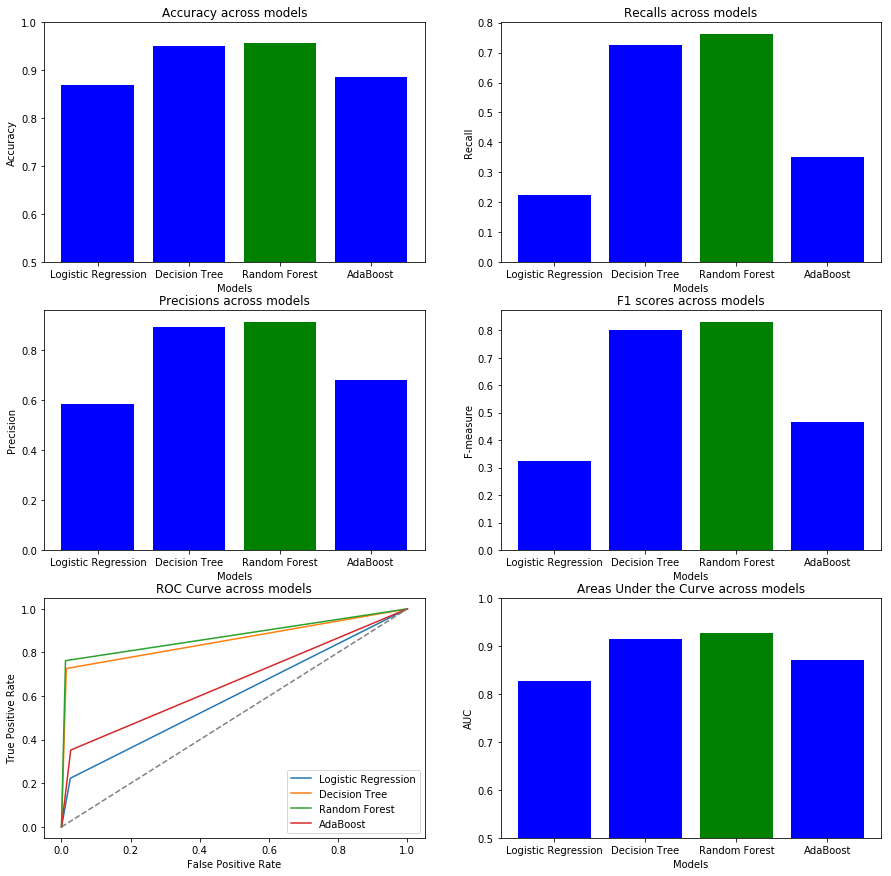

In [30]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

accuracy_models = [accuracy_score(y_test, predictions_glm), 
                   accuracy_score(y_test, predictions_tree), 
                   accuracy_score(y_test, predictions_rf),
                   accuracy_score(y_test, predictions_boost)]

recall_models = [recall_score(y_test, predictions_glm),
                 recall_score(y_test, predictions_tree),
                 recall_score(y_test, predictions_rf),
                 recall_score(y_test, predictions_boost)]

precision_models = [precision_score(y_test, predictions_glm),
                    precision_score(y_test, predictions_tree),
                    precision_score(y_test, predictions_rf),
                    precision_score(y_test, predictions_boost)]

f1_score_models = [f1_score(y_test, predictions_glm),
                   f1_score(y_test, predictions_tree),
                   f1_score(y_test, predictions_rf),
                   f1_score(y_test, predictions_boost)]
                  
    
auc_models = [roc_auc_score(y_test, model_glm.predict_proba(X_test)[:,1]),
              roc_auc_score(y_test, model_tree.predict_proba(X_test)[:,1]),
              roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1]),
              roc_auc_score(y_test, model_boost.predict_proba(X_test)[:,1])]
                            
models = ["Logistic Regression", "Decision Tree", "Random Forest", "AdaBoost"]

colors  = ["blue", "blue", "green", "blue"]

plt.figure(figsize=(15,15))

plt.subplot(321)
plt.bar(range(4), accuracy_models, color = colors)
plt.xticks(range(4), models)
plt.ylim([0.5, 1])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy across models")


plt.subplot(322)
plt.bar(range(4), recall_models, color = colors)
plt.xticks(range(4), models)
#plt.ylim([0.5, 1])
plt.xlabel("Models")
plt.ylabel("Recall")
plt.title("Recalls across models")

plt.subplot(323)
plt.bar(range(4), precision_models, color = colors)
plt.xticks(range(4), models)
#plt.ylim([0.5, 1])
plt.xlabel("Models")
plt.ylabel("Precision")
plt.title("Precisions across models")

plt.subplot(324)
plt.bar(range(4), f1_score_models, color = colors)
plt.xticks(range(4), models)
#plt.ylim([0.5, 1])
plt.xlabel("Models")
plt.ylabel("F-measure")
plt.title("F1 scores across models")

plt.subplot(325)

fpr, tpr, _ = roc_curve(y_test, predictions_glm)
auc = roc_auc_score(y_test, predictions_glm)
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, predictions_tree)
auc = roc_auc_score(y_test, predictions_tree)
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, predictions_rf)
auc = roc_auc_score(y_test, predictions_rf)
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, predictions_boost)
auc = roc_auc_score(y_test, predictions_boost)
plt.plot(fpr, tpr)

plt.legend(models)
plt.plot([0, 1], color = "grey", linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve across models")

plt.subplot(326)
plt.bar(range(4), auc_models, color = colors)
plt.xticks(range(4), models)
plt.ylim([0.5, 1])
plt.xlabel("Models")
plt.ylabel("AUC")
plt.title("Areas Under the Curve across models")

plt.show()

## Blending and Stacking

In this section, we try more advanced techniques in machine learning. Blending refers to construct a more powerful classifier that consists in a voting classifier based upon the ones we just saw. Stacking refers to the use of outputs of our different models as inputs of a new one. The latter technique is more tricky as it easily results in overfitting. For both techniques, the main idea is to combine the information gained from several different sub models.

In [31]:
# Blending: we aggregate the different probabilities given by the decision tree, 
# random forest and the AdaBoost
predictions_blending = (model_tree.predict_proba(X_test)[:,1] 
                        + model_rf.predict_proba(X_test)[:,1]
                        + model_boost.predict_proba(X_test)[:,1])/3

# Stacking: we piled the probabilities from precedent models into a new data set as features
X_train_stacking = np.array([model_glm.predict_proba(X_train)[:,1], 
                             model_tree.predict_proba(X_train)[:,1],
                             model_rf.predict_proba(X_train)[:,1],
                             model_boost.predict_proba(X_train)[:,1]]).T

X_test_stacking = np.array([model_glm.predict_proba(X_test)[:,1], 
                            model_tree.predict_proba(X_test)[:,1],
                            model_rf.predict_proba(X_test)[:,1],
                            model_boost.predict_proba(X_test)[:,1]]).T

In [32]:
# We run a simple logistic regression that takes as inputs probabilities and output a new one
from sklearn.linear_model import LogisticRegression

model_glm_stacking = LogisticRegression()

model_glm_stacking.fit(X_train_stacking, y_train)

model_glm_stacking_predictions = model_glm_stacking.predict(X_test_stacking)

In [33]:
# We check the performance of these new models
print("Blending AUC: " + str(round(roc_auc_score(y_test, predictions_blending), 2)))
print("Stacking AUC: " + str(round(roc_auc_score(y_test, model_glm_stacking_predictions), 2)))

Blending AUC: 0.92
Stacking AUC: 0.9


We see that the blending one slightly outperforms the random forest score. However, the stacking one underperforms. That can be easily explain by the fact that both the number of observations and the number of features are small. In all cases, these techniques have a drawback to be very difficult to interpret.

# Step 5: Interpretation of results

First, we have to highlight the fact that logistic regression and decision tree are machine learning models that are easily interpretable while random forests and boosting models are more complex to interpret. These last models tend to perform better in general in prediction tasks.


Thus, if we want to maximise the **recall**, meaning we want to be sure to not avoid flaging a customer who will churn, the most promising model would be random forests (0.78).

Besides, if we want to maximise the **precision**, meaning when the models tells us this customer is going to churn, we want to be very confident on this claim, the most promising model would also be random forests (0.93).

# Step 6: Business strategies

So far, we have synthesized whats drives the most churn in our market and identify the most powerful machine learning for predicting churn in the future.

Now, based upon the insights we have we propose two main business strategies in order to limit future churn in phone lines:

- One solution would be to send a voucher to customers who are flagged as potential churners. This offer could allow them for example a *discount* on several months if they subscribed for a certain period. This kind of marketing campaign can be costly. That is why we want to target only very high probable future churners (even if some are missed). We would advise to use the machine learning based on the random forests model in this case.


- Another solution would be to send an *email* that remind new advantages of subscriptions offers to customers in order to get in touch again with them. This solution is not really costly and is much *mass market* focused. That is why we want here to target all potential churners (even if a few targeted ones are not). We would advise to use the machine learning based on the random forest model in this case. 